$\color{brown}{\text{HCIN 620 Lab 5 Unsupervised Clustering Algorithms}}$

The following resources have been used to generate this notebook

https://realpython.com/k-means-clustering-python/

Data is located at UCI repository. Check the link for further information. 

https://archive.ics.uci.edu/ml/datasets/HCV+data

The k-means clustering method is an unsupervised machine learning technique used to identify clusters of data objects in a dataset. There are many different types of clustering methods, but k-means is one of the oldest and most approachable. These traits make implementing k-means clustering in Python reasonably straightforward, even for novice programmers and data scientists.

If you’re interested in learning how and when to implement k-means clustering in Python, then this is the right place. You’ll walk through an end-to-end example of k-means clustering using Python, from preprocessing the data to evaluating results.

In this tutorial, you’ll learn:
 
* What k-means clustering is

* When to use k-means clustering to analyze your data

* How to implement k-means clustering in Python with scikit-learn

* How to select a meaningful number of clusters </div>

Notebook by Reza Afra, Ph.D. and Barbara Berkovich, Ph.D., M.A.

Last update December 29, 2020


# **Step 1 Environment Setup**

##Import Code Libraries.

The first set of libraries is the same as Modules 2-4 with the addition of [plotly.express ](https://plotly.com/python/plotly-express/)

**Run Import 1.**


In [707]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
sns.set(style='white', palette='muted', color_codes=True)
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
import plotly.express as px 

Scikit Learn (Rhymes with psychic) is the main machine learning library in Python. The [scikit-learn.org](https://scikit-learn.org/stable/) maintains the open source code. </br>

**Question 1**  Give a very brief description of the following sklearn classes*:

1. KMeans   [Type answer here] ---A machine learning method for identification of collections(cluster) of data within a data set
2. PCA      [Type answer here] -- A tool that changes input data from larger number scales into smaller ones
3. Pipeline [Type answer here] -- A tool used to group different data entities together

'* *Note that classes in this context refers to subprograms within the code libaries. Do not confuse this with the term classes as it is used in machine learning classification models.*


**Run the code to complete the import 2.**

In [708]:
from sklearn.metrics import r2_score, mean_squared_error, adjusted_rand_score, silhouette_score,accuracy_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.pipeline import Pipeline 
from sklearn.model_selection import train_test_split 
from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.impute import SimpleImputer

from sklearn.decomposition import PCA 
from sklearn.cluster import KMeans

# **Step 2 Data Cleaning**

**Use the Folder and upload icons (left) to upload data-lab-5-hcv.csv**

**Run the code** to read the hepatitis C virus (HCV) data in the Colab Runtime Environment.


In [709]:
data = pd.read_csv(r'c:\Github\Fullstack-Data-Analyst\Learning\the_data\data-lab-5-hcv.csv')

**Question 2** Another way to view the data in Python is simply to use the name of the data frame.  In this case we've read the input file into a data frame call **hcv**. Enter that name on the next command line. </br>
**Run it.**

In [710]:
# Answer 2: Add the name of the data frame below

data.head(1)

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0


In [711]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  615 non-null    int64  
 1   Category    615 non-null    object 
 2   Age         615 non-null    int64  
 3   Sex         615 non-null    object 
 4   ALB         614 non-null    float64
 5   ALP         597 non-null    float64
 6   ALT         614 non-null    float64
 7   AST         615 non-null    float64
 8   BIL         615 non-null    float64
 9   CHE         615 non-null    float64
 10  CHOL        605 non-null    float64
 11  CREA        615 non-null    float64
 12  GGT         615 non-null    float64
 13  PROT        614 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 67.4+ KB


##Handle missing values



Run the code below to check for null values. 

In [712]:
data.isnull().sum()

Unnamed: 0     0
Category       0
Age            0
Sex            0
ALB            1
ALP           18
ALT            1
AST            0
BIL            0
CHE            0
CHOL          10
CREA           0
GGT            0
PROT           1
dtype: int64

**Question 3** </br>

Edit this text cell to answer the questions below: 
1. List the variables with NaN (not a number) values. [Type Answer Here]
2. List the ALP row numbers that contain NaN          [Type Answer Here]



**Question 4**
Use the fillna command using the 'ffill' method to replace NaN with the value of the previous row. </br>Print the data frame as  you did in Question 2 to confirm that NaN has been replaced.

**Run the fillna step**

In [713]:
data['ALB'].fillna(method='ffill', inplace=True)
data['ALT'].fillna(7.7, inplace=True)

# data.fillna(method='ffill', inplace=True)



In [714]:
imput = SimpleImputer(missing_values=np.NaN, strategy='most_frequent')
data['ALP'] = imput.fit_transform(data[['ALP']])

In [715]:
data.fillna(method='bfill', inplace=True)

In [716]:
data.isnull().sum()

Unnamed: 0    0
Category      0
Age           0
Sex           0
ALB           0
ALP           0
ALT           0
AST           0
BIL           0
CHE           0
CHOL          0
CREA          0
GGT           0
PROT          0
dtype: int64

**Question 5** In the original dataset (Question 2), lines 613 and 614 had missing values (NaN) for the variable ALP. Answer the following questions about the results of the 'ffill' method.


1. What is the new values of ALP on rows 613 and 614? 
   
   [Type answer here]
2. Where did that number come from? 
   
   [Type answer here]
3. How does this differ from the backfill method used in Lab 2 (Question 11)?
 
   [type answer here]

4.  What is the term we use when we fill the missing values with "guesses"?
   [type answer here]

5.  What is another way we could handle the missing data?
    [type answer here]





##Drop Unnecessary Variables

**Question 6** The first column,'Unnamed:  0' is a dummy variable in place of the patient id (removed for privacy).</br>Enter and run the code to drop the column 'Unnamed: 0'</br>Print the dataframe as you have in previous steps to verify that the NaN values have been replaced.</br>

NOTE: Python has context sensitive help. Type in **hcv.dr** and pause to see the help in a pop-up window.
</br>




In [717]:
data = data.drop(data.columns[[0]], axis=1)

In [718]:
data

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,3=Cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,3=Cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,3=Cirrhosis,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,3=Cirrhosis,46,f,33.0,52.5,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


# **Step 3 Exploratory Data Analysis (EDA)**


##Scatter Matrix

**Category** contains the code indicating the diagnosis.
0=Blood donor (undiagnosed)
0s=suspect blood donor (suspected of liver disease, unconfirmed)
1=Hepatitis
2=Fibrosis
3=Cirrhosis
If we were using a supervised machine learning technique, this column might be the target and the values would be training labels. </br>
Since we are using and unsupervised technique, we will just use Category in our visual data exploration, and not in the actual clustering algorithm.

Read about the plotly.express [scatter_matrix](https://plotly.com/python/splom/)

**Run the plotly command below which plots the correlations between the labs for each value of Category.**


In [719]:
scat_plots = data.drop(columns='Category')
fig = px.scatter_matrix(data,
dimensions=list(scat_plots.columns),
color = 'Category' )
fig.show()

**Question 7**  </br>
Study the scatter matrix. Can you see cells where the data is well separated, and would be a good candidate for clustering? Edit this text box to record your answers below.

1. List the  columns where the category colors *are* well separated across multiple rows.

[Type answer here]

2. List the columns where the category colors *are not* well separated across multiple rows. 

[Type answer here]



Since we are working with a multidimensional array, we can only visualize the location of dots on a plane. We can zoom in on a single cell of the scatter matrix to see more detail.

**Run the next code cell** to zoom in on the plot of CHE vs CHOL.

In [720]:
fig = px.scatter_matrix( 
    data,
    dimensions=['CHE', 'CHOL'],
    color='Category'
)
fig.show()

**Question 8**


With the increased resolution in these plots, how might you interpret the relationship between CHE, CHOL and the category information?

[Type answer here]

There are no fixed rules for visualizing the relationships within this data. One can iterate two by two matricies for other columns as we have just done.
</br></br>
*At the  beginnning of any analysis do a little homework to increase your clinical understanding of the data elements. Whenever possible seek collaboration with a trained clinician to be aware of known correlations.*
</br></br>

##Heatmap

**Run the code below** to generate a heatmap



<AxesSubplot:>

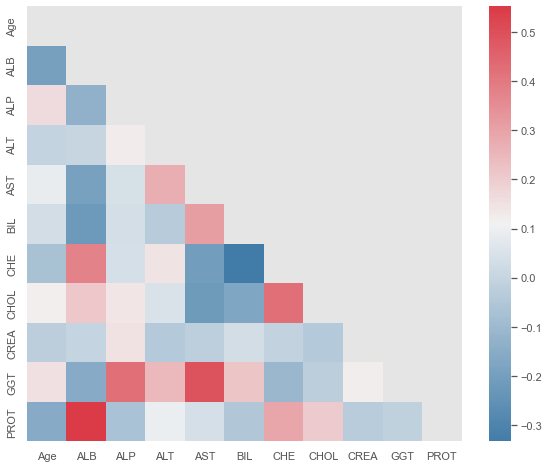

In [721]:
f, ax = plt.subplots(figsize=(10,8))

sns.heatmap(data.corr(), mask=np.triu(np.ones_like(data.corr(), dtype=bool)), cmap=sns.diverging_palette(240,10, as_cmap=True), square=True, ax=ax) 

##Correlation Matrix

**Question 9**

Enter the command to generate a correlation matrix.

**Run the corr command**

In [722]:
# Answer 9: Type the command to print correlation matrix in this cell, and run.
data.corr()['CHOL'].sort_values(ascending=False)

CHOL    1.000000
CHE     0.420878
ALB     0.212986
PROT    0.202960
ALP     0.137615
Age     0.119060
ALT     0.050614
GGT    -0.022513
CREA   -0.043389
BIL    -0.176671
AST    -0.215813
Name: CHOL, dtype: float64

##Preprocessing



##Encode the data


Since there is no ordinal relationship among the category labels, the following code encodes these as separate columns of ones and zeros.

**Run the encoding.**


In [723]:
data['category_col'] = data['Category']

cat_col = data['category_col']
data = data.drop(columns=['category_col'])
data.insert(loc=1, column='category_col', value=cat_col)


In [724]:
data['new_sex_col'] = data['Sex']

sex_col = data['new_sex_col']
data = data.drop(columns=['new_sex_col'])
data.insert(loc=4, column='new_sex_col', value=sex_col)

In [725]:
# data 
new_data = data
new_data

,Category,category_col,Age,Sex,new_sex_col,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0=Blood Donor,0=Blood Donor,32,m,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0=Blood Donor,0=Blood Donor,32,m,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0=Blood Donor,0=Blood Donor,32,m,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0=Blood Donor,0=Blood Donor,32,m,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0=Blood Donor,0=Blood Donor,32,m,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,3=Cirrhosis,3=Cirrhosis,62,f,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,3=Cirrhosis,3=Cirrhosis,64,f,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,3=Cirrhosis,3=Cirrhosis,64,f,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,3=Cirrhosis,3=Cirrhosis,46,f,f,33.0,52.5,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


In [726]:
#ASSIGN Value variables for columns with desired dictionaries
category_values = new_data['category_col']
sex_values = new_data['new_sex_col']

#Label Encode the Data
le = LabelEncoder()
le.fit(new_data.category_col)
new_data.category_col = le.fit_transform(new_data.category_col)



#Assign a variable for the newly Labelled encoded data
le_category = le.fit_transform(new_data.category_col)


#Start the Dictionary Transformation process
category_col_dictionary = np.unique(category_values)
le_category_dictionary = np.unique(le_category)

#Assign the dictionary variable
category_dictionary = dict(zip(category_col_dictionary, le_category_dictionary))



#Since Label Encoding only uses one column, repeat this process for other columns

le.fit(new_data.new_sex_col)
new_data.new_sex_col = le.fit_transform(new_data.new_sex_col)
le_sex = le.fit_transform(new_data.new_sex_col)

sex_col_dictionary = np.unique(sex_values)
le_sex_dictionary = np.unique(le_sex)

sex_dictionary = dict(zip(sex_col_dictionary, le_sex_dictionary))


# new_data

# Show Dictionary

In [727]:
#print the the Dictionary or dictionaries(best find a code to merge the dictionaries together)

In [728]:
category_dictionary

{'0=Blood Donor': 0,
 '0s=suspect Blood Donor': 1,
 '1=Hepatitis': 2,
 '2=Fibrosis': 3,
 '3=Cirrhosis': 4}

In [729]:
sex_dictionary

{'f': 0, 'm': 1}

**Question 10** The original Category column has been transformed.

How many category columns are there now?

**Answer 10**

[Type answer here]

##Pipeline



In practical machine learning pipelines, it’s common for the data to undergo multiple sequences of transformations before it feeds into a clustering algorithm. You learned about the importance of one of these transformation steps, feature scaling in an earlier lab. An equally important data transformation technique is dimensionality reduction, which reduces the number of features in the dataset by either removing or combining them.
Dimensionality reduction techniques help to address a problem with machine learning algorithms known as the curse of dimensionality. In short, as the number of features increases, the feature space becomes sparse. This sparsity makes it difficult for algorithms to find data objects near one another in higher-dimensional space.

###Dimensionality Reduction using Principal Component Analysis (PCA)
PCA is one of many dimensionality reduction techniques. It transforms the input data by projecting it into a lower number of dimensions called components. The components capture the variability of the input data through a linear combination of the input data’s features.

The next code block is another application of scikit-learn pipelines. In Lab 4, we used a pipeline to scale the variables, and assign to the x and y values for regression. In this lab, we will use the pipeline to scale the numeric data and perform PCA dimensionality reduction in preparation for the clustering algorithm.




###MinMaxScaler

The pipeline will implement an alternative to the StandardScaler class called MinMaxScaler for feature scaling. You use MinMaxScaler when you do not assume that the shape of all your features follows a normal distribution.

**Run the pipeline.**

# Column Transformer

In [730]:
#Remember the category_col is our target and will be dropped, so as Category and Sex

features = data.drop(['category_col'], axis=1)

In [731]:
full_pipeline = ColumnTransformer([ 
    ('num', StandardScaler(), ['Age', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']),
    ('cat', OrdinalEncoder(), ['Sex'])
],
remainder='drop'
)

In [732]:
X = full_pipeline.fit_transform(features)
y_target = data['category_col']

In [733]:
#To print the head and tail do this
num_X = pd.DataFrame(X)
num_X.tail(2)

,0,1,2,3,4,5,6,7,8,9,10,11
613,-0.140155,-1.492664,-0.594777,0.415963,0.823066,0.437665,-2.103866,-1.012544,-0.589106,0.191642,-0.192645,0.0
614,1.153773,-0.972930,-0.594777,2.813575,1.367468,0.030689,0.396289,-0.048888,-0.287390,-0.101309,-0.748700,0.0


In [734]:
num_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       615 non-null    float64
 1   1       615 non-null    float64
 2   2       615 non-null    float64
 3   3       615 non-null    float64
 4   4       615 non-null    float64
 5   5       615 non-null    float64
 6   6       615 non-null    float64
 7   7       615 non-null    float64
 8   8       615 non-null    float64
 9   9       615 non-null    float64
 10  10      615 non-null    float64
 11  11      615 non-null    float64
dtypes: float64(12)
memory usage: 57.8 KB


# TEST THE DATA USING ONE OF THE MANY MODELS

In [735]:

X_train, X_test, y_train, y_test = train_test_split(X,y_target, test_size=0.3, random_state=42)

# LOGISTIC Reg

In [738]:
linreg = LogisticRegression()
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)
print(f' Accuracy on test set: {accuracy_score(y_test, y_pred):.3f}')

 Accuracy on test set: 0.897


# **Step 4 Build the Model**

##KMeans Clustering Algorithm

Now that you’ve built a pipeline to process the data, you’ll build a separate pipeline to perform k-means clustering. You’ll override the following default arguments of the KMeans class:</br>
**init=k-means++**" instead of "random" to ensure centroids are initialized with some distance between them. In most cases, this will be an improvement over "random".

**n_init=50**: You’ll increase the number of initializations to ensure you find a stable solution.

**max_iter=500**: You’ll increase the number of iterations per initialization to ensure that k-means will converge.


**Run the initialization pipeline.**

**Run the preprocesser and clustering pipeline.**

**Run the code to fit the model to the data.**

##Evaluate Results


As mentioned earlier, the scale for each of these clustering performance metrics ranges from -1 to 1. A silhouette coefficient of 0 indicates that clusters are significantly overlapping one another, and a silhouette coefficient of 1 indicates clusters are well-separated. An ARI score of 0 indicates that cluster labels are randomly assigned, and an ARI score of 1 means that the true labels and predicted labels form identical clusters.

**Run the code to generate a silhouette coefficient.**

The silhouette value indicates that the model predicted the correct cluster 94.5% of the time. 

We can add the predicted_labels column to the hcv dataframe to visually confirm how many predicted_labels match with the categories.

**Run the code to print the hcv data frame with the predicted labels.**

*Note: Scroll data table to the right to see the predicted_labels column.*

Since you specified n_components=2 in the PCA step of the k-means clustering pipeline, you can also visualize the data in the context of the true labels and predicted labels. 

**Run the code to plot the results using a pandas DataFrame and the seaborn plotting library.**

The visual representation of the clusters confirms the results of the two clustering evaluation metrics. The performance of your pipeline was pretty good. The clusters only slightly overlapped, and cluster assignments were much better than random.